2021/12/10

This code is for showing example of how to use original class function "Radial_file_extraction" for the purpose of radial file extraction in soft wood species.

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import os, sys
import cv2
import copy
from tqdm import tqdm
from skimage.future import graph
from skimage import draw
import itertools
from scipy import interpolate
import common.Radial_file_extraction
import time
from matplotlib import patches

In [2]:
#set path
current_path=os.getcwd()
npz_path=os.path.join(current_path, "npz_file")
save_path=os.path.join(current_path, "fig_save")

#load npz file
npz_files=os.listdir(npz_path)
npz_file_anatomical_param=[i for i in npz_files if "anatomical_parameters_x40" in i]
npz_anatomical_param=np.load(os.path.join(npz_path, npz_file_anatomical_param[0]))
npz_file_matching=[i for i in npz_files if "FLM_ret_matching_results_x40" in i]
npz_matching=np.load(os.path.join(npz_path, npz_file_matching[0]))

In [3]:
#load anatomical data
label_map=npz_anatomical_param["label_map"].flatten()
cell_cx=npz_anatomical_param["cell_cx_list"]
cell_cy=npz_anatomical_param["cell_cy_list"]
cell_area=npz_anatomical_param["cell_area_list"]
#cell_width=npz_anatomical_param["cell_width_list"]
cell_circle_level=npz_anatomical_param["cell_circle_level_list"]
flm=np.uint8(npz_matching["flm_b_ori"])
boundary_im=npz_matching["boundary_im_ori"]
#label_map=npz_matching["nuclei_ori"]
height, width=flm.shape

In [4]:
#call class
#This class contains functions for creating RAG network and automatical radial file assumption
radial_file_extraction=Radial_file_extraction.Radial_file_extraction(label_map.reshape((height, width)), cell_cx, cell_cy)

In [5]:
#create RAG
edge_list, result_im = radial_file_extraction.draw_RAG(image=flm, return_im=True)

C:\Users\yusukekita\Documents\lab\plant_cell\2021\experiment\for_first_paper\20211129\Radial_file_extraction.py:80: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  circle = draw.circle(y1,x1, 7)


In [6]:
#conduct radial file extraction

#severe condition 
radial_file_1=radial_file_extraction.radial_file_extraction([cell_area], [0.4], 25, edge_list)

#loose condition
radial_file_2=radial_file_extraction.radial_file_extraction([cell_area], [1.0], 25, edge_list)

1 radial file is extracted
10 radial file is extracted
20 radial file is extracted
30 radial file is extracted
40 radial file is extracted
50 radial file is extracted
60 radial file is extracted
70 radial file is extracted
80 radial file is extracted
90 radial file is extracted
100 radial file is extracted
110 radial file is extracted
120 radial file is extracted
130 radial file is extracted
140 radial file is extracted
150 radial file is extracted
160 radial file is extracted
170 radial file is extracted
180 radial file is extracted
190 radial file is extracted
200 radial file is extracted
Finally, 201 radial files are extracted
1 radial file is extracted
10 radial file is extracted
20 radial file is extracted
30 radial file is extracted
40 radial file is extracted
50 radial file is extracted
60 radial file is extracted
70 radial file is extracted
80 radial file is extracted
90 radial file is extracted
100 radial file is extracted
110 radial file is extracted
120 radial file is extrac

In [7]:
#show result
#radial_file_1
t1 = time.time() 

label_map_copy=copy.deepcopy(label_map).flatten()
final_result_1=np.zeros((len(label_map_copy)))

new_label=[list(np.ones(len(radial_file_1[i]))*(i+1)) for i in range(len(radial_file_1))]
new_label=[e for row in new_label for e in row]

target_label=[e for row in radial_file_1 for e in row]

#set function
replace_func = {label: new for label, new in zip(target_label, new_label)}

#replace label values to anatomical values
replace_result=np.asarray(list(map(replace_func.get, label_map_copy)))
result_index=np.where(replace_result!=None)[0]

#project the result to zero map
final_result_1[result_index]=replace_result[result_index]

t2 = time.time()

print(str(t2-t1)+" sec")

8.117727518081665 sec


In [8]:
#radial_file_2
t1 = time.time() 

final_result_2=np.zeros((len(label_map_copy)))

new_label=[list(np.ones(len(radial_file_2[i]))*(i+1)) for i in range(len(radial_file_2))]
new_label=[e for row in new_label for e in row]

target_label=[e for row in radial_file_2 for e in row]

#set function
replace_func = {label: new for label, new in zip(target_label, new_label)}

#replace label values to anatomical values
replace_result=np.asarray(list(map(replace_func.get, label_map_copy)))
result_index=np.where(replace_result!=None)[0]

#project the result to zero map
final_result_2[result_index]=replace_result[result_index]

t2 = time.time()

print(str(t2-t1)+" sec")

8.170714378356934 sec


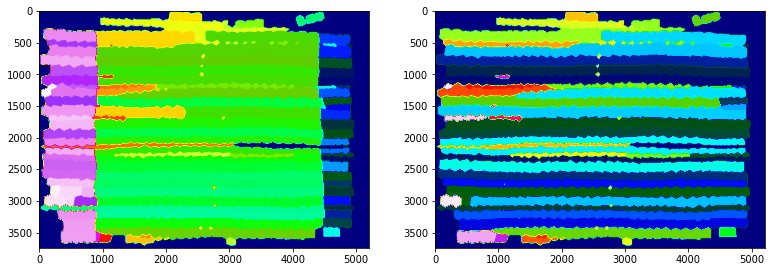

In [9]:
fig, ax=plt.subplots(1, 2, figsize=(13, 5))
ax[0].imshow(final_result_1.reshape((height, width)), cmap="gist_ncar")
ax[1].imshow(final_result_2.reshape((height, width)), cmap="gist_ncar")
plt.show()
plt.close()

In [10]:
#call new class
#This class is for detecting annual ring boundary and extract radial files with annual ring width
radial_file_annual_ring=Radial_file_extraction.Radial_file_annual_ring(flm, radial_file_1, radial_file_2, cell_cx, cell_cy)

In [11]:
#get candidates of radial files with annual ring width 
radial_file_annual_length_candidate=radial_file_annual_ring.select_radial_file_candidate(0.3)

100%|█████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 494.10it/s]
C:\Users\yusukekita\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [12]:
#extract anatomical parameters of each cell belonging to each file
radial_file_cell_pos_list, radial_file_cell_dist_list, \
radial_file_cell_label_list, radial_file_cell_area_list \
=radial_file_annual_ring.extract_radial_file_anatomical_param(radial_file_annual_length_candidate, cell_area)

100%|███████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 21031.61it/s]


In [13]:
#detecting cell located at annual ring boundary
#This function aims to detect the first earlywood tracheids in each ring adjacent to the last latewood tracheids
boundary_cell_list=radial_file_annual_ring.extract_boundary_cell(radial_file_cell_pos_list, 
                                                                 radial_file_cell_dist_list, 
                                                                 radial_file_cell_label_list, 0.7, 40, 
                                                                 radial_file_cell_area_list, [0.5])

In [14]:
#pruninig boundary cells
boundary_cell_list_fltered=radial_file_annual_ring.select_radial_file_by_height(boundary_cell_list, 0.5)

In [15]:
#get the radial file with annual ring width
radial_file_result_list=radial_file_annual_ring.pred_boundary(boundary_cell_list_fltered, 0.1)

100%|██████████████████████████████████████████████████████████████████████████████| 201/201 [00:00<00:00, 7178.48it/s]


In [16]:
#create exaggerated boundary image
boundary_im_expand=cv2.GaussianBlur(np.uint8(boundary_im),(7,7),0)
boundary_im_expand=np.where(boundary_im_expand>0, 255, 0)
boundary_index=np.where(boundary_im_expand.flatten()==255)[0]

In [38]:
#show result on original flm
t1 = time.time()
radial_file_result=np.zeros((len(label_map_copy)))
flm_copy=copy.deepcopy(flm).flatten()

for i in range(len(radial_file_result_list)):
    if len(radial_file_result_list[i])>0:
        #set target
        target_file=radial_file_result_list[i]
        
        #flatten and convert list in list to list
        target_file_flatten=[list(target_file[i]) for i in range(len(target_file))]
        target_label=list(radial_file_annual_ring.flatten_list(target_file_flatten))
        
        #set new label
        new_label=[list(np.ones(len(target_file[j]))*(j+1)*10) for j in range(len(target_file))]
        new_label=[e for row in new_label for e in row]

        #set function
        replace_func = {label: new for label, new in zip(target_label, new_label)}

        #replace label values to anatomical values
        replace_result=np.asarray(list(map(replace_func.get, label_map_copy)))
        result_index=np.where(replace_result!=None)[0]

        #project the result to zero map
        flm_copy[result_index]=replace_result[result_index]
        
        #ovaelay boundary
        boundary_cell_index=list(set(result_index)&set(boundary_index))
        flm_copy[boundary_cell_index]=0
        
    else:
        pass
    

t2 = time.time()

print(str(t2-t1)+" sec")

9.831469297409058 sec


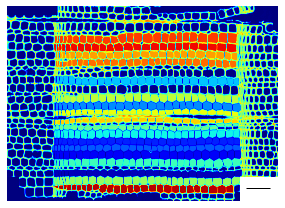

In [51]:
#result visualization
fig, ax=plt.subplots(figsize=(5, 3))
ax.imshow(flm_copy.reshape((height, width)), cmap="jet")
ax.axis("off")

r = patches.Rectangle( (4500,3300) , 1000, 1000, fill=True, color="white", linewidth=3)
ax.add_patch(r)
r = patches.Rectangle( (4600,3500) , 463, 2, fill=True, color="black")
ax.add_patch(r)

plt.tight_layout()
plt.savefig(os.path.join(save_path, "Result_of_radial_file_extraction_x40.png"), dpi=300)
plt.show()
plt.close()

In [35]:
#save as npz
#save the result as npz
np.savez(os.path.join(npz_path, "radial_file_result_x40.npz"), 
         radial_file_result_list=radial_file_result_list[0],
         radial_file_summary=[radial_file_1, radial_file_2], 
         label_map=label_map)

C:\Users\yusukekita\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [81]:
#show result on original flm
t1 = time.time()
radial_file_result=np.zeros((len(label_map_copy)))
flm_copy=copy.deepcopy(flm).flatten()

for i in range(len(radial_file_result_list)):
    if len(radial_file_result_list[i])>0:    
        #set target
        target_file=radial_file_result_list[i]

        #flatten and convert list in list to list
        target_file_flatten=[list(target_file[j]) for j in range(len(target_file)) if j==2]
        target_label=list(radial_file_annual_ring.flatten_list(target_file_flatten))

        #set new label
        new_label=[list(np.ones(len(target_file[j]))*(j+1)*60) for j in range(len(target_file)) if j==2]
        new_label=[e for row in new_label for e in row]

        #set function
        replace_func = {label: new for label, new in zip(target_label, new_label)}

        #replace label values to anatomical values
        replace_result=np.asarray(list(map(replace_func.get, label_map_copy)))
        result_index=np.where(replace_result!=None)[0]

        #project the result to zero map
        flm_copy[result_index]=replace_result[result_index]

        #ovaelay boundary
        boundary_cell_index=list(set(result_index)&set(boundary_index))
        flm_copy[boundary_cell_index]=0

        
    else:
        pass
    

t2 = time.time()

print(str(t2-t1)+" sec")

8.684988260269165 sec


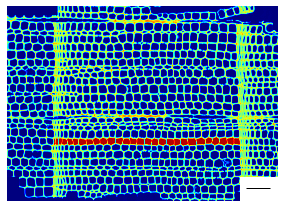

In [83]:
#result visualization
fig, ax=plt.subplots(figsize=(5, 3))
ax.imshow(flm_copy.reshape((height, width)), cmap="jet")
ax.axis("off")

r = patches.Rectangle( (4500,3300) , 1000, 1000, fill=True, color="white", linewidth=3)
ax.add_patch(r)
r = patches.Rectangle( (4600,3500) , 463, 2, fill=True, color="black")
ax.add_patch(r)

plt.tight_layout()
plt.savefig(os.path.join(save_path, "Result_of_radial_file_extraction_radial_file_2_x40.png"), dpi=300)
plt.show()
plt.close()